In [7]:
import geopandas as gpd
import shapely
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

print("Kurulum başarılı!")

Kurulum başarılı!


In [47]:
# Shapefile dosyasının tam yolunu belirtme
shapefile_path = "/Users/canyonder/Desktop/tur_adm_file/tur_admbnda_adm1_2025.shp"

# Shapefile dosyasını okuma
gdf = gpd.read_file(shapefile_path)

# Veriyi görüntüleme
print(gdf.head())

   ADM0_TR ADM0_PCODE         ADM1_TR         ADM1_EN ADM1_PCODE  \
0  Türkiye        TUR           ADANA           ADANA     TUR001   
1  Türkiye        TUR        ADIYAMAN        ADIYAMAN     TUR002   
2  Türkiye        TUR  AFYONKARAHİSAR  AFYONKARAHISAR     TUR003   
3  Türkiye        TUR            AĞRI            AGRI     TUR004   
4  Türkiye        TUR         AKSARAY         AKSARAY     TUR068   

                                            geometry  
0  POLYGON ((36.31587 38.36376, 36.31769 38.36367...  
1  POLYGON ((39.25297 38.18188, 39.25334 38.18159...  
2  POLYGON ((31.14797 39.26246, 31.15825 39.25753...  
3  POLYGON ((43.28706 40.01281, 43.29129 40.00884...  
4  POLYGON ((33.96446 39.03804, 33.96453 39.03723...  


In [31]:
print(gdf.columns)

Index(['ADM0_TR', 'ADM0_PCODE', 'ADM1_TR', 'ADM1_EN', 'ADM1_PCODE', 'geometry',
       'centroid_column'],
      dtype='object')


In [25]:
print(gdf.crs) # verinin mevcut CRS'sini kontrol etme


EPSG:4326


In [28]:
# Öncelikle uygun bir metrik CRS'ye dönüştürme (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Centroid hesaplama
gdf['centroid_column'] = gdf.geometry.centroid

In [29]:
# İllere merkez noktaları atama
#gdf = gdf.set_geometry('centroid_colomn')

In [26]:
# Haritayı gösterme
plt.show()

<Axes: >

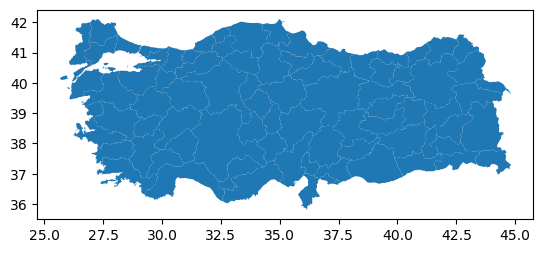

In [48]:
# Veriyi çizdirme
gdf.plot()

<Axes: >

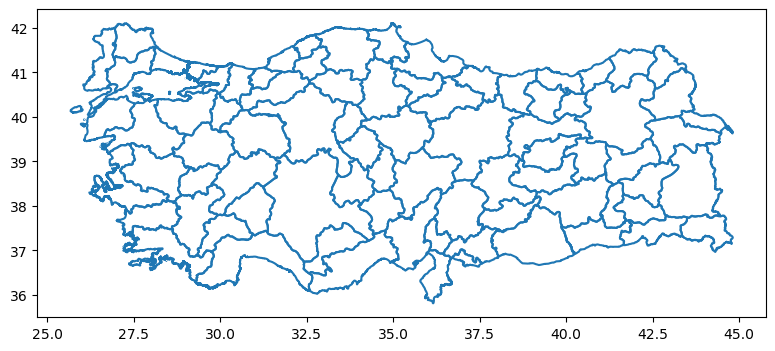

In [27]:
# İl sınırlarını çizdirme
gdf.boundary.plot(figsize=(10,4))

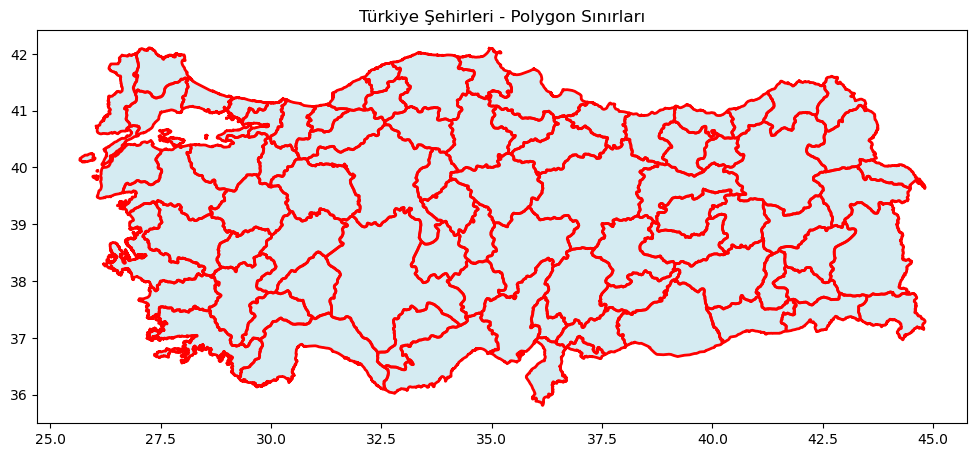

In [49]:
# Şehir sınırlarını birleştir (eğer ilçeler de varsa)
if "ADM1_TR" in gdf.columns:  # Eğer şehir sütunu varsa
    gdf = gdf.dissolve(by="ADM1_TR")

# Harita üzerinde Polygon'ları gösterme
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Her ilin polygon sınırlarını çizme (tekil polygon ve çokgen için)
for _, row in gdf.iterrows():
    geometry = row['geometry']
    if geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:
            x, y = polygon.exterior.xy
            ax.plot(x, y, color='red', lw=2)
    else:
        x, y = geometry.exterior.xy
        ax.plot(x, y, color='red', lw=2)

plt.title("Türkiye Şehirleri - Polygon Sınırları")
plt.show()



In [8]:
# CSV dosyasını okuma
df = pd.read_csv("/Users/canyonder/Desktop/unitsWithCitiesAndCoordinates1.csv")

# Veriyi görüntüleme
print(df.head())

                                 UnitId  \
0  4336AE35-AB9D-4960-B329-000495A891C7   
1  971E0669-16F6-49A2-8C42-00054C598F76   
2  BB31476D-5FC2-46F4-A72E-000A5CD7DAD8   
3  533756BB-0E43-4F6B-8494-000B8EFB8C48   
4  B02BDAB6-80D7-4418-8F48-000CEF708A7D   

                                    UnitName       CityName DistrictName  \
0                             İLKAY ECZANESİ          Muğla      Menteşe   
1                              ELİF ECZANESİ  Kahramanmaraş   Onikişubat   
2                            GÖRELE ECZANESİ        Giresun       Görele   
3  KONYA EREĞLİ 07 NOLU AİLE SAĞLIĞI MERKEZİ          Konya       Ereğli   
4                          ÖZYILMAZ ECZANESİ        Antalya     Manavgat   

   Latitude  Longitude  
0  37.20917   28.40901  
1  37.57345   36.91934  
2  41.03152   39.00532  
3  37.50072   34.05714  
4  36.80468   31.42254  


In [20]:
# CRS bilgisini kontrol etme
print("CRS bilgisi:", gdf.crs)

CRS bilgisi: EPSG:4326


In [18]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import Polygon


# Shapefile dosyasının yolunu belirtme
shapefile_path = "/Users/canyonder/Desktop/tur_adm_file/tur_admbnda_adm1_2025.shp"

try:
    # Shapefile'ı yükleme
    gdf = gpd.read_file(shapefile_path)
    if gdf.crs is None:
        raise ValueError("Shapefile'de CRS bilgisi bulunmuyor. Lütfen CRS'yi manuel olarak belirtin.")
except Exception as e:
    print(f"Shapefile yüklenirken hata oluştu: {e}")
    exit()

# Shapefile'deki koordinatları ve centroid'leri kontrol etme
gdf = gdf.to_crs(epsg=4326)  # GeoDataFrame'in CRS'sini, CSV'deki koordinatlar ile uyumlu olacak şekilde (WGS84) dönüştürme

# CSV dosyasını okuma
file_path = "/Users/canyonder/Desktop/unitsWithCitiesAndCoordinates1.csv"
try:
    df = pd.read_csv(file_path, encoding="utf-8")
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
except Exception as e:
    print(f"CSV dosyası yüklenirken hata oluştu: {e}")
    exit()

# Geometrik noktalar oluşturma
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# GeoDataFrame'e dönüştürme
df_geo = gpd.GeoDataFrame(df, geometry='geometry')
df_geo = df_geo.set_crs(epsg=4326)  # GeoDataFrame'in CRS'sini ayarla

# Spatial join işlemi (Hata kontrolü ile)
try:
    joined = gpd.sjoin(df_geo, gdf, how="left", predicate="within")
    print("Spatial join başarılı!")
except Exception as e:
    print(f"Spatial join başarısız: {e}")

# Hatalı kayıtların belirlenmesi
invalid_records = joined[joined["index_right"].isnull()]["UnitId"].tolist()

# Hatalı kayıt sayısını yazdırma
print(f"Hatalı kayıt sayısı: {len(invalid_records)}")

# İlk 5 hatalı kaydı yazdırma
print("İlk 5 hatalı kayıt:", invalid_records[:5])



Spatial join başarılı!
Hatalı kayıt sayısı: 1077
İlk 5 hatalı kayıt: ['3E5F92C0-97F9-4B2F-9887-00114C736286', '2822F5E7-3BC5-48B1-B8D4-00AC6138FBF8', '614C5CA6-6D51-4064-907B-00C37D302FB4', '8B0045A4-DF37-4E1A-A692-00DC0E8B049B', 'A417E5DC-7178-407A-B257-0133524DC9B4']


In [ ]:
pip install openpyxl
#excel için gerekli

In [4]:
import pandas as pd

# Hatalı kayıtları içeren DataFrame oluştur
invalid_df = df[df["UnitId"].isin(invalid_records)]

# Hatalı kayıt sayısını hesapla
num_invalid_records = len(invalid_df)  # Önce değişkeni tanımlıyoruz


# Excel dosyasına kaydet (Masaüstüne)
invalid_df.to_excel(r"/Users/canyonder/Desktop/invalid_records.xlsx", index=False)

print("Excel dosyası başarıyla masaüstüne kaydedildi: /Users/canyonder/Desktop/invalid_records.xlsx")
print(f"Toplam hatalı kayıt sayısı: {num_invalid_records}")

Excel dosyası başarıyla masaüstüne kaydedildi: /Users/canyonder/Desktop/invalid_records.xlsx
Toplam hatalı kayıt sayısı: 1077


In [34]:
# CityName sütunundaki benzersiz değerleri yazdırma
print(joined["CityName"].unique())


['Muğla' 'Kahramanmaraş' 'Giresun' 'Konya' 'Antalya' 'İstanbul' 'Edirne'
 'Isparta' 'Adana' 'Ankara' 'İzmir' 'Sakarya' 'Adiyaman' 'Muş' 'Malatya'
 'Mersin' 'Erzincan' 'Gaziantep' 'Samsun' 'Osmaniye' 'Trabzon' 'Aydin'
 'Bursa' 'Manisa' 'Eskişehir' 'Sivas' 'Zonguldak' 'Van' 'Uşak' 'Hatay'
 'Bayburt' 'Niğde' 'Denizli' 'Yalova' 'Batman' 'Kayseri' 'Diyarbakir'
 'Kocaeli' 'Tekirdağ' 'Mardin' 'Düzce' 'Şanliurfa' 'Hakkari' 'Kütahya'
 'Amasya' 'Karaman' 'Rize' 'Nevşehir' 'Bartin' 'Kirşehir' 'Çankiri' 'Ordu'
 'Bilecik' 'Çanakkale' 'Aksaray' 'Tokat' 'Balikesir' 'Şirnak' 'Artvin'
 'Iğdir' 'Burdur' 'Karabük' 'Ağri' 'Erzurum' 'Afyonkarahisar' 'Elaziğ'
 'Yozgat' 'Kars' 'Kirklareli' 'Bingöl' 'Kirikkale' 'Gümüşhane' 'Çorum'
 'Kastamonu' 'Bolu' 'Sinop' 'Siirt' 'Bitlis' 'Tunceli' 'Kilis' 'Ardahan']


In [39]:
# Gaziantep'teki noktaları seçme
antep_records = joined[joined["CityName"].str.strip().str.lower() == "gaziantep".lower()]

# Sonuçları kontrol etme
print(antep_records)


                                     UnitId  \
25     3F12B767-E712-4A9A-ADC8-001FB029D05A   
65     937B6056-6643-47CF-AA34-004EC32C59A2   
72     3D460B94-C6AF-4DC6-9ED2-0050E3AD378E   
76     95693625-EFF9-462D-8F7C-00584BFB974F   
193    2A5AC4EC-21CE-4208-88C0-00C39B286A46   
...                                     ...   
58816  1D0B29FF-04E9-4466-B631-FEEE0A069328   
58845  0AC7569D-B1EF-47C6-B81F-FF0F47A06E80   
58890  B795F6E8-F963-46F6-9C40-FF41C1AC7B82   
58935  EE574A72-3EF0-48A7-B0E5-FF8541FAEB22   
58986  D3FA134D-1DB6-4F35-A937-FFC360209BDD   

                                                UnitName   CityName  \
25                             ÜNİVERSİTE ÖZDEN ECZANESİ  Gaziantep   
65     GAZİANTEP BİR BİRLEŞİM ÖZEL EĞİTİM VE REHABİLİ...  Gaziantep   
72       GAZİANTEP ŞAHİNBEY 26 NOLU AİLE SAĞLIĞI MERKEZİ  Gaziantep   
76                                     YEŞİLOVA ECZANESİ  Gaziantep   
193                                       BARIŞ ECZANESİ  Gaziantep   
...      

In [40]:
# Noktanın bulunduğu şehri kontrol etme
city_check = joined[joined["CityName"] == "Gaziantep"]  # "NAME_1" sütunu şehir isimlerini içerdiğini varsayalım

if not city_check.empty:
    print("Bazı noktalar Gaziantep sınırları içinde.")
else:
    print("CSV'deki noktaların hiçbiri Gaziantep'te değil.")

Bazı noktalar Gaziantep sınırları içinde.


In [29]:
print(joined.columns)


Index(['UnitId', 'UnitName', 'CityName', 'DistrictName', 'Latitude',
       'Longitude', 'geometry', 'index_right', 'ADM0_TR', 'ADM0_PCODE',
       'ADM1_TR', 'ADM1_EN', 'ADM1_PCODE'],
      dtype='object')


In [30]:

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import Polygon


# Shapefile dosyasının yolunu belirtme
shapefile_path = "/Users/canyonder/Desktop/tur_adm_file/tur_admbnda_adm1_2025.shp"

try:
    # Shapefile'ı yükleme
    gdf = gpd.read_file(shapefile_path)
    if gdf.crs is None:
        raise ValueError("Shapefile'de CRS bilgisi bulunmuyor. Lütfen CRS'yi manuel olarak belirtin.")
except Exception as e:
    print(f"Shapefile yüklenirken hata oluştu: {e}")
    exit()

# Shapefile'deki koordinatları ve centroid'leri kontrol etme
gdf = gdf.to_crs(epsg=4326)  # GeoDataFrame'in CRS'sini, CSV'deki koordinatlar ile uyumlu olacak şekilde (WGS84) dönüştürme

# CSV dosyasını okuma
file_path = "/Users/canyonder/Desktop/unitsWithCitiesAndCoordinates1.csv"
try:
    df = pd.read_csv(file_path, encoding="utf-8")
    df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
    df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
except Exception as e:
    print(f"CSV dosyası yüklenirken hata oluştu: {e}")
    exit()

# Geometrik noktalar oluşturma
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# GeoDataFrame'e dönüştürme
df_geo = gpd.GeoDataFrame(df, geometry='geometry')
df_geo = df_geo.set_crs(epsg=4326)  # GeoDataFrame'in CRS'sini ayarla

# Noktaların şehir sınırlarıyla kesişimini kontrol etme (spatial join)
joined = gpd.sjoin(df_geo, gdf, how="left", predicate="within")

# 2 kilometre (yaklaşık 0.02 derece) buffer eklemek için tüm illere buffer ekliyoruz
gdf['geometry'] = gdf['geometry'].apply(lambda x: x.buffer(0.01) if isinstance(x, Polygon) else x)

# Hatalı kayıtların belirlenmesi
invalid_records = joined[joined["index_right"].isnull()]["UnitId"].tolist()

# Hatalı kayıt sayısını yazdırma
print(f"Hatalı kayıt sayısı: {len(invalid_records)}")

# İlk 5 hatalı kaydı yazdırma
print("İlk 5 hatalı kayıt:", invalid_records[:5])




Hatalı kayıt sayısı: 1077
İlk 5 hatalı kayıt: ['3E5F92C0-97F9-4B2F-9887-00114C736286', '2822F5E7-3BC5-48B1-B8D4-00AC6138FBF8', '614C5CA6-6D51-4064-907B-00C37D302FB4', '8B0045A4-DF37-4E1A-A692-00DC0E8B049B', 'A417E5DC-7178-407A-B257-0133524DC9B4']


In [8]:
import pandas as pd

# Hatalı kayıtları ve şüpheli kayıtları içeren dosyaları oku
invalid_records_path = "/Users/canyonder/Desktop/invalid_records.xlsx"
suspicious_records_path = "/Users/canyonder/Desktop/suspicious_records.xlsx"

invalid_df = pd.read_excel(invalid_records_path)
suspicious_df = pd.read_excel(suspicious_records_path)

# Şüpheli kayıtları hatalı kayıtlardan çıkar
clean_invalid_df = invalid_df[~invalid_df["UnitId"].isin(suspicious_df["UnitId"])]

# Yeni temizlenmiş listeyi Excel'e kaydet
output_path = "/Users/canyonder/Desktop/clean_invalid_records.xlsx"
clean_invalid_df.to_excel(output_path, index=False)

# Toplam kaç kayıt kaldığını yazdır
clean_count = len(clean_invalid_df)
print(f"Temizlenmiş hatalı kayıtlar: {clean_count} adet kayıt kaldı.")
print(f"Temizlenmiş hatalı kayıtlar masaüstüne başarıyla kaydedildi: {output_path}")


Temizlenmiş hatalı kayıtlar: 904 adet kayıt kaldı.
Temizlenmiş hatalı kayıtlar masaüstüne başarıyla kaydedildi: /Users/canyonder/Desktop/clean_invalid_records.xlsx
